# 1 Import the datasets and libraries

In [62]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

data=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [63]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [64]:
data.shape #How many rows and columns are there

(5000, 14)

In [65]:
data.info()  #which data types are there in the data. Only CCAvg has decimals.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [66]:
data.describe().transpose() #which values do we have?

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [67]:
data.isnull().values.any()  #Check any null values. No null values there

False

In [68]:
dupes = data['ID'].duplicated() #Check for duplicate IDs. Then it would use data twice.
sum(dupes) #No duplicates found

0

# 2 EDA: Study the data distribution.

(array([ 40.,  53.,  78.,  91., 103., 123., 136., 125., 120., 120., 285.,
        107., 106., 115., 133., 125., 136., 126., 149., 121., 254., 113.,
        118., 115., 138., 129., 145., 112., 143., 125., 267., 143., 132.,
        127., 122., 123., 108.,  78.,  80.,  36.]),
 array([23. , 24.1, 25.2, 26.3, 27.4, 28.5, 29.6, 30.7, 31.8, 32.9, 34. ,
        35.1, 36.2, 37.3, 38.4, 39.5, 40.6, 41.7, 42.8, 43.9, 45. , 46.1,
        47.2, 48.3, 49.4, 50.5, 51.6, 52.7, 53.8, 54.9, 56. , 57.1, 58.2,
        59.3, 60.4, 61.5, 62.6, 63.7, 64.8, 65.9, 67. ]),
 <a list of 40 Patch objects>)

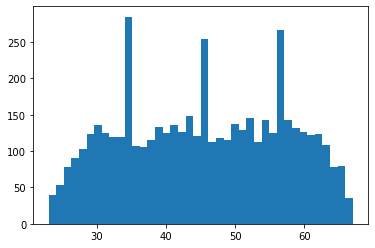

In [69]:
plt.hist(data['Age'], bins=40 )#Apparently ages around 35, 45 and 55 occur 
#more than the other ages. 

(array([ 19.,  33.,  66.,  74.,  85., 129., 259., 119., 121., 119., 147.,
        118., 116., 219., 127., 119., 127., 125., 137., 135., 261., 124.,
        144., 131., 142., 134., 263., 124., 126., 104., 154., 117., 125.,
        257., 116.,  88.,  85.,  57.,  43.,  11.]),
 array([-3.  , -1.85, -0.7 ,  0.45,  1.6 ,  2.75,  3.9 ,  5.05,  6.2 ,
         7.35,  8.5 ,  9.65, 10.8 , 11.95, 13.1 , 14.25, 15.4 , 16.55,
        17.7 , 18.85, 20.  , 21.15, 22.3 , 23.45, 24.6 , 25.75, 26.9 ,
        28.05, 29.2 , 30.35, 31.5 , 32.65, 33.8 , 34.95, 36.1 , 37.25,
        38.4 , 39.55, 40.7 , 41.85, 43.  ]),
 <a list of 40 Patch objects>)

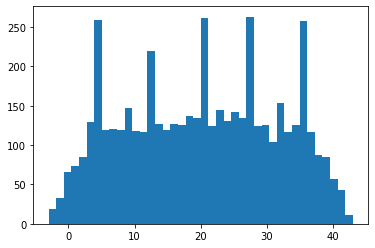

In [70]:
plt.hist(data['Experience'], bins=40)#show a somewhat similar view to the age.

In [71]:
data.corr() #Check the correlation

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [72]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=11):
    corr = data.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=66)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

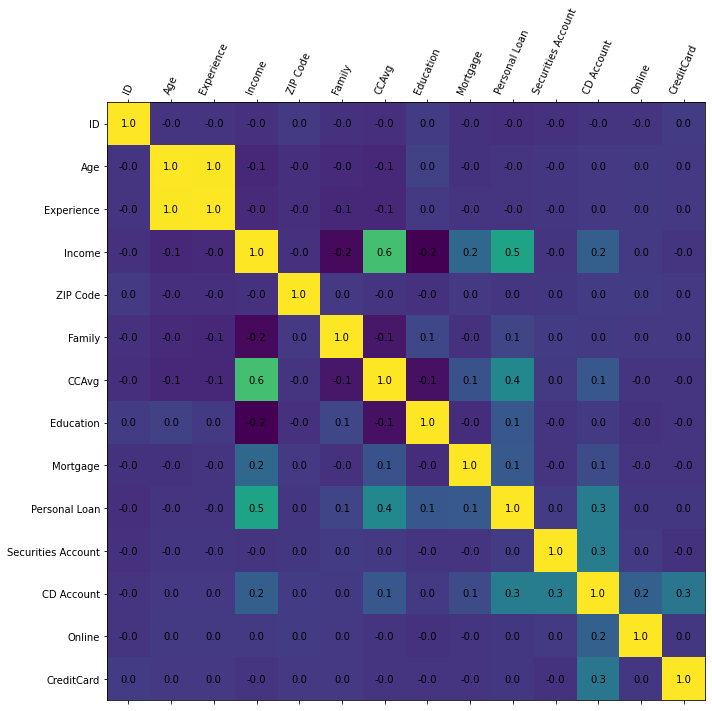

In [73]:
plot_corr(data)
#the only correlated data seem to be the Income-CCAvg and Personal Loan-Income. So Income seems to be a 
#important for the Personal Loan result.

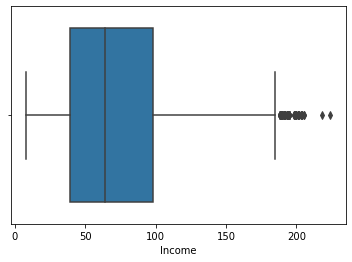

In [74]:
#Income and CCAvg seem to have a very small correlation with Personal loan.
sns.boxplot(data['Income']);

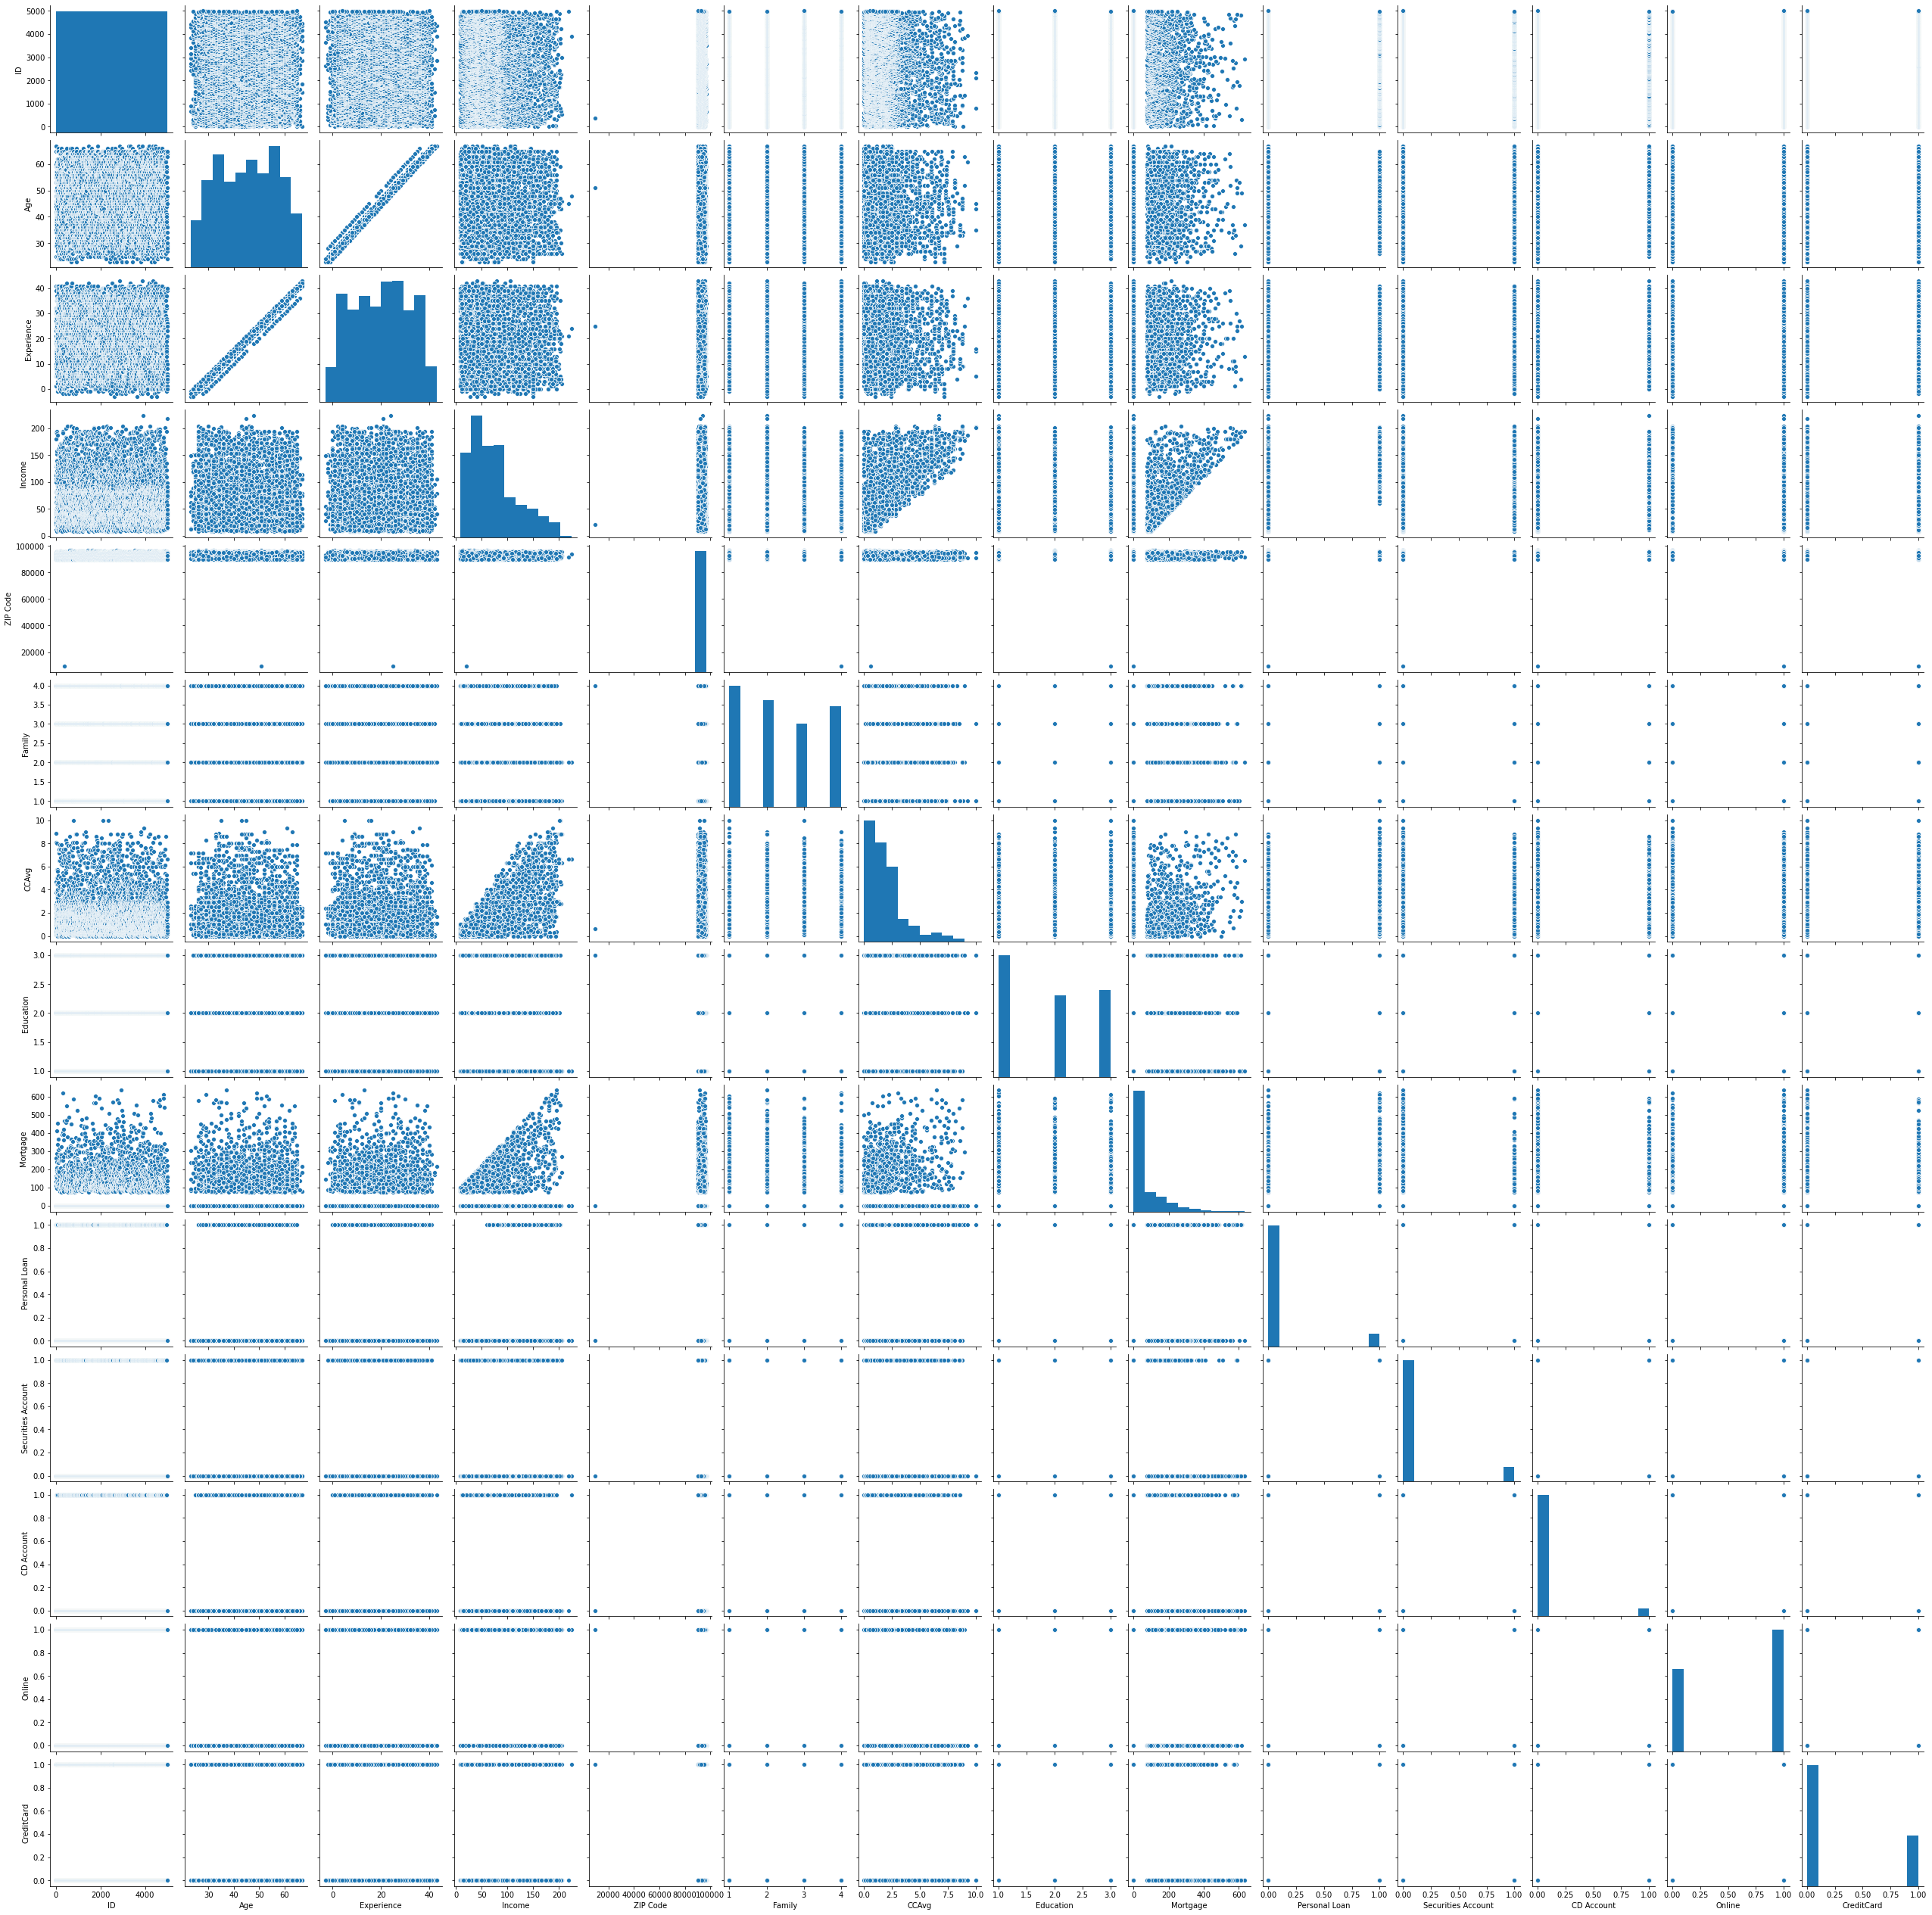

In [75]:
sns.pairplot(data) #check correlations via scatterplots.
#Correlations are not directly visible. Except the one identified above.

In [76]:
data['Age'].value_counts(normalize=True)

35    0.0302
43    0.0298
52    0.0290
58    0.0286
54    0.0286
50    0.0276
41    0.0272
30    0.0272
56    0.0270
34    0.0268
39    0.0266
59    0.0264
57    0.0264
51    0.0258
60    0.0254
45    0.0254
46    0.0254
42    0.0252
40    0.0250
31    0.0250
55    0.0250
62    0.0246
29    0.0246
61    0.0244
44    0.0242
32    0.0240
33    0.0240
48    0.0236
38    0.0230
49    0.0230
47    0.0226
53    0.0224
63    0.0216
36    0.0214
37    0.0212
28    0.0206
27    0.0182
65    0.0160
64    0.0156
26    0.0156
25    0.0106
24    0.0056
66    0.0048
23    0.0024
67    0.0024
Name: Age, dtype: float64

In [77]:
data['Experience'].value_counts(normalize=True)

 32    0.0308
 20    0.0296
 9     0.0294
 5     0.0292
 23    0.0288
 35    0.0286
 25    0.0284
 28    0.0276
 18    0.0274
 19    0.0270
 26    0.0268
 24    0.0262
 3     0.0258
 14    0.0254
 16    0.0254
 30    0.0252
 34    0.0250
 27    0.0250
 17    0.0250
 29    0.0248
 22    0.0248
 7     0.0242
 8     0.0238
 6     0.0238
 15    0.0238
 10    0.0236
 33    0.0234
 13    0.0234
 11    0.0232
 37    0.0232
 36    0.0228
 21    0.0226
 4     0.0226
 31    0.0208
 12    0.0204
 38    0.0176
 39    0.0170
 2     0.0170
 1     0.0148
 0     0.0132
 40    0.0114
 41    0.0086
-1     0.0066
-2     0.0030
 42    0.0016
-3     0.0008
 43    0.0006
Name: Experience, dtype: float64

In [78]:
data[data['Experience']<0] #the age of most of the records 
#with experience <0 are about 24.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [79]:
data[data['Age'].isin([24,25])].mean().T
#we are going to change the experience years to 0. That is closest to the mean of
#24 and 25 year olds (the actual mean for 24,25 year old is -0.38). Most of the found records with Experience < 0 have 
# an age around 24,25.

ID                     2215.777778
Age                      24.654321
Experience               -0.382716
Income                   69.481481
ZIP Code              93248.777778
Family                    2.777778
CCAvg                     1.876914
Education                 1.876543
Mortgage                 46.086420
Personal Loan             0.000000
Securities Account        0.123457
CD Account                0.012346
Online                    0.567901
CreditCard                0.246914
dtype: float64

In [80]:
#Replace these values with the mean of 24,25 year olds. Om this case
# the mean of experience for that age group is -0,38. We will put it on 0.
data['Experience'].values[data['Experience'].values < 0] = 0
#data['Experience'].mean()

#data[data['Experience']<0]['Experience'].value=data['Experience'].mean()6

In [81]:
data[data['Experience']<0] #Check whether the experience is changed. No rows detected anymore with Experience<0

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [82]:
data['Education'].value_counts(normalize=True)

1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64

In [83]:
data['Securities Account'].value_counts(normalize=True)

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

In [84]:
data['CD Account'].value_counts(normalize=True)

0    0.9396
1    0.0604
Name: CD Account, dtype: float64

In [85]:
data['Online'].value_counts(normalize=True)

1    0.5968
0    0.4032
Name: Online, dtype: float64

In [86]:
data['CreditCard'].value_counts(normalize=True)

0    0.706
1    0.294
Name: CreditCard, dtype: float64

In [87]:
#Number of people with zero mortgage? 3462 people have zero mortgage.
data[data['Mortgage']==0]['ID'].count() #Number of people with 0 mortage. 3462

3462

In [88]:
#Number of people with zero credit card spending per month. 106 people.
data[data['CCAvg']==0]['ID'].count()

106

In [89]:
#item.iloc[:,3:22].sum(axis=0)

data.iloc[:,[9,10,11,12,13]].sum(axis=0)

#The majority of the people are using the online internet banking facilities. 
#Only 480 people have applied for the personal loan in the previous campaign.

Personal Loan          480
Securities Account     522
CD Account             302
Online                2984
CreditCard            1470
dtype: int64

In [90]:
#MAke the categorical variables as category 
data['Securities Account'] = data['Securities Account'].astype('category')
data['CD Account'] = data['CD Account'].astype('category')
data['Online'] = data['Online'].astype('category')
data['CreditCard'] = data['CreditCard'].astype('category')
data['Personal Loan'] = data['Personal Loan'].astype('category')

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIP Code            5000 non-null   int64   
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   int64   
 8   Mortgage            5000 non-null   int64   
 9   Personal Loan       5000 non-null   category
 10  Securities Account  5000 non-null   category
 11  CD Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(5), float64(1), int64(8)
memory usage: 376.6 KB


# Get data model ready

In [92]:
X=data.drop(['Personal Loan','ID','ZIP Code'],axis=1)
Y=data['Personal Loan'].astype('category')

In [93]:
X

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0


In [94]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: category
Categories (2, int64): [0, 1]

# 3 Split the data into training and test set in 70:30 ratio

In [95]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

In [97]:
#Check how the data is split
print("{0:0.2f}% data is in training set".format((len(X_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(data.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [98]:
#Check how the data is split
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(data[data['Personal Loan'] == 1]), (len(data.loc[data['Personal Loan'] == 1])/len(data.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(data.loc[data['Personal Loan'] == 0]), (len(data.loc[data['Personal Loan'] == 0])/len(data.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)



The split into a training and test set seems ok when looked at the original
dataset.

# 4 Use Logistic Regression model to predict

In [99]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs',random_state=42, max_iter=100000)
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
X

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0


In [101]:
y_predict = logreg.predict(X_test)

In [102]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9522857142857143

Testing accuracy 0.9486666666666667

Confusion Matrix


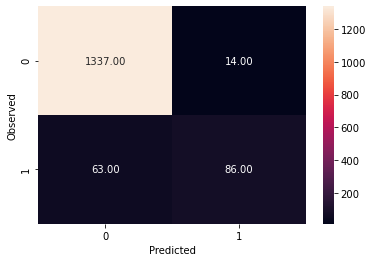

None

Recall: 0.5771812080536913

Precision: 0.86

F1 Score: 0.6907630522088354

Roc Auc Score: 0.7834092568765866


In [103]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

We are mainly interested in the precision model as we want to maximize the TP 
and minimize the FP. A Precision of 1 would be ideal.Then the Business could 
focus on the customer of which it is predicted that they take a loan. 
According to the model you would then have a high rate.

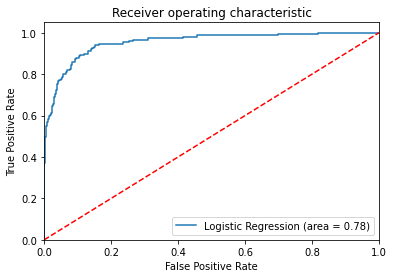

In [105]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The performance is quite good. The FPR is quite low and the TPR is high. 
This means that if the client has a dataset with customers or potential customers
it is they can use the model to contact only those customer with prediction=1.
(which means that they take a loan). The chance that that customer will
take the loan is high if you look at the score of the model.

# Give your reasoning on how can the model perform better?

The model could perform better by changing the parameters, being:

- Add more data, because more data will improve the accuracy of the model.

- Delete the outliers or treat those separately. On Income for example you could see that there were a number of outliers.

- Try other algorithms. (solver parameter that is used for calculations
                        #(newton-cfg, lbfgs, liblinear, sag, saga) )

- penalty l1, l2
This is used to specify the norm used in the penalization.(used to avoid overfitting of the model)

In [106]:
# Checking Parameters of logistic regression
logreg.get_params()

#If we dont specify the parameters in the model it takes default value

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [107]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i,max_iter=100000)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),4))
    test_score.append(round(model.score(X_test, y_test),4))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.952, 0.9517, 0.952, 0.95, 0.9443]

[0.948, 0.948, 0.9453, 0.946, 0.9427]


The currently used model is lbfgs. The other models do not significantly perform better 
on the test set. Only the newton-cg only performs slightly better on the training data set, but remains the same on the 
test dataset.

In [108]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['liblinear','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i,max_iter=100000)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.951, 0.944]

[0.945, 0.943]


No improvements when using a different penalty.

In [109]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.876, 0.894, 0.901, 0.902, 0.902, 0.902]

[0.868, 0.889, 0.893, 0.891, 0.891, 0.891]


This has not improved the models performance. The used one of 0.75 is 
still a very good performance. It cannot be improved.

# 6 Give Business understanding of your model

The precision is a good rate, because the TPR needs to be maximized and
the FPR needs to be minimized. 

The Business can enter the data of a number of clients in the model. Then 
the ones of which are predicted with value 1 (it is predicted that that 
customer applies for the loan.) the business can focus on those customers.
In our test set out of 100 customers actually 86 customers took the loan. 
If the business would have used the model for these 100 customers to focus 
on it would get a rate of 86%. 